In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Load data
file_path = 'IMDb Movies India.csv'  # Replace with your file path
movies_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display first few rows
print(movies_data.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [14]:
# Remove rows where the 'Rating' is missing (target variable)
movies_data_cleaned = movies_data.dropna(subset=['Rating'])

# Fill missing categorical data with 'Unknown'
movies_data_cleaned['Director'].fillna('Unknown', inplace=True)
movies_data_cleaned['Actor 1'].fillna('Unknown', inplace=True)
movies_data_cleaned['Actor 2'].fillna('Unknown', inplace=True)
movies_data_cleaned['Actor 3'].fillna('Unknown', inplace=True)
movies_data_cleaned['Genre'].fillna('Unknown', inplace=True)

# Convert 'Duration' to numeric and fill missing values with median
movies_data_cleaned['Duration'] = movies_data_cleaned['Duration'].str.replace(' min', '').astype(float)
movies_data_cleaned['Duration'].fillna(movies_data_cleaned['Duration'].median(), inplace=True)

# Extract numeric year and fill missing values with median
movies_data_cleaned['Year'] = movies_data_cleaned['Year'].str.extract('(\d+)').astype(float)
movies_data_cleaned['Year'].fillna(movies_data_cleaned['Year'].median(), inplace=True)


<ipython-input-14-88d2c87109fa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_data_cleaned['Director'].fillna('Unknown', inplace=True)
<ipython-input-14-88d2c87109fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_cleaned['Director'].fillna('Unknown', inplace=True)
<ipython-input-14-88d2c87109fa>:6: FutureWarning: A val

In [15]:
# Label encoding for categorical features (Genre, Director, Actors)
label_encoder = LabelEncoder()

movies_data_cleaned['Genre'] = label_encoder.fit_transform(movies_data_cleaned['Genre'])
movies_data_cleaned['Director'] = label_encoder.fit_transform(movies_data_cleaned['Director'])
movies_data_cleaned['Actor 1'] = label_encoder.fit_transform(movies_data_cleaned['Actor 1'])
movies_data_cleaned['Actor 2'] = label_encoder.fit_transform(movies_data_cleaned['Actor 2'])
movies_data_cleaned['Actor 3'] = label_encoder.fit_transform(movies_data_cleaned['Actor 3'])


<ipython-input-15-551c7a07515c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_cleaned['Genre'] = label_encoder.fit_transform(movies_data_cleaned['Genre'])
<ipython-input-15-551c7a07515c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_cleaned['Director'] = label_encoder.fit_transform(movies_data_cleaned['Director'])
<ipython-input-15-551c7a07515c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [16]:
# Features and target variable
X = movies_data_cleaned[['Genre', 'Duration', 'Year', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = movies_data_cleaned['Rating']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Check for missing values in the features
print(X_train.isnull().sum())

# Fill missing 'Votes' values with median or 0 (whichever fits your case)
X_train['Votes'].fillna(0, inplace=True)
X_test['Votes'].fillna(0, inplace=True)

# Convert 'Votes' to numeric (in case it contains non-numeric data)
X_train['Votes'] = pd.to_numeric(X_train['Votes'], errors='coerce')
X_test['Votes'] = pd.to_numeric(X_test['Votes'], errors='coerce')

# Fill any remaining NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


Genre       0
Duration    0
Year        0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


<ipython-input-18-0b00beec7a90>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Votes'].fillna(0, inplace=True)
<ipython-input-18-0b00beec7a90>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [19]:
# Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Decision Tree MAE: {mae_dt}")


Decision Tree MAE: 1.1789141414141413


In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Instantiate the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and MAE
best_params = grid_search.best_params_
best_mae = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best Decision Tree MAE after tuning: {best_mae}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best Decision Tree MAE after tuning: 0.94986574857828


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")


Random Forest MAE: 0.8628150252525253


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Gradient Boosting MAE: {mae_gb}")


Gradient Boosting MAE: 0.8641000118515619


In [24]:
# Train Decision Tree Regressor
dt_model.fit(X_train, y_train)

# Train Random Forest Regressor
rf_model.fit(X_train, y_train)

# Train Gradient Boosting Regressor
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

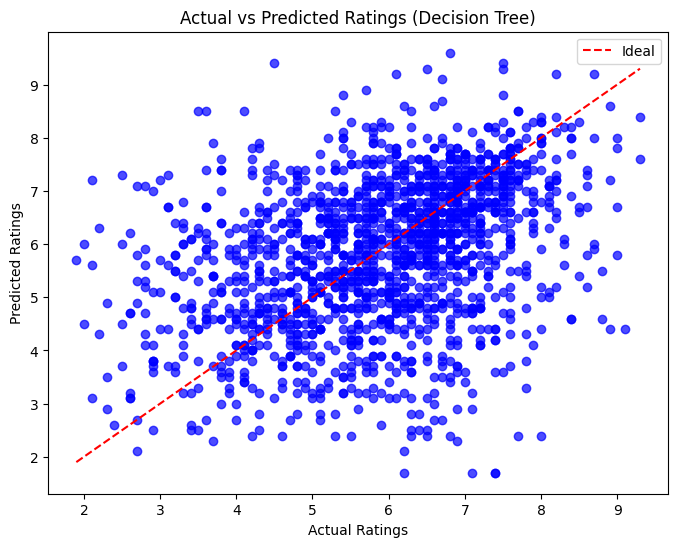

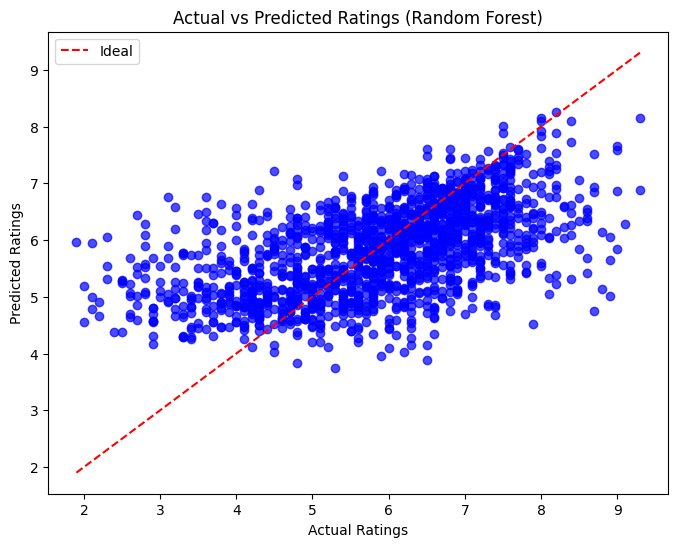

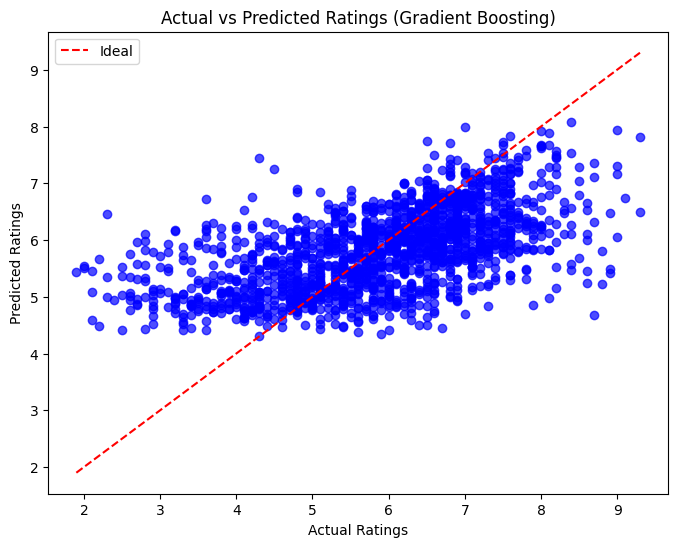

In [25]:
# Predict and plot for Decision Tree
y_pred_dt = dt_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred_dt, "Decision Tree")

# Predict and plot for Random Forest
y_pred_rf = rf_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest")

# Predict and plot for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred_gb, "Gradient Boosting")


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot feature importance
def plot_feature_importance(model, X_train, model_name):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    features = X_train.columns

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance ({model_name})')
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
    plt.show()


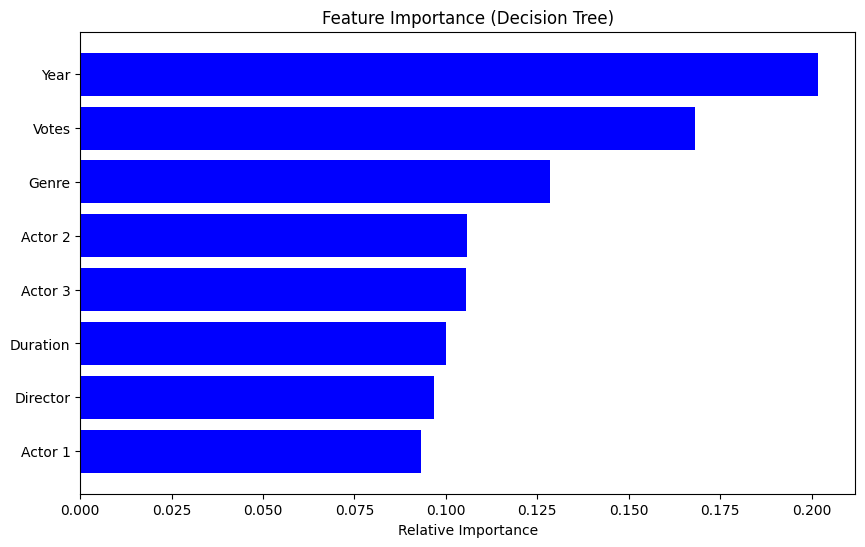

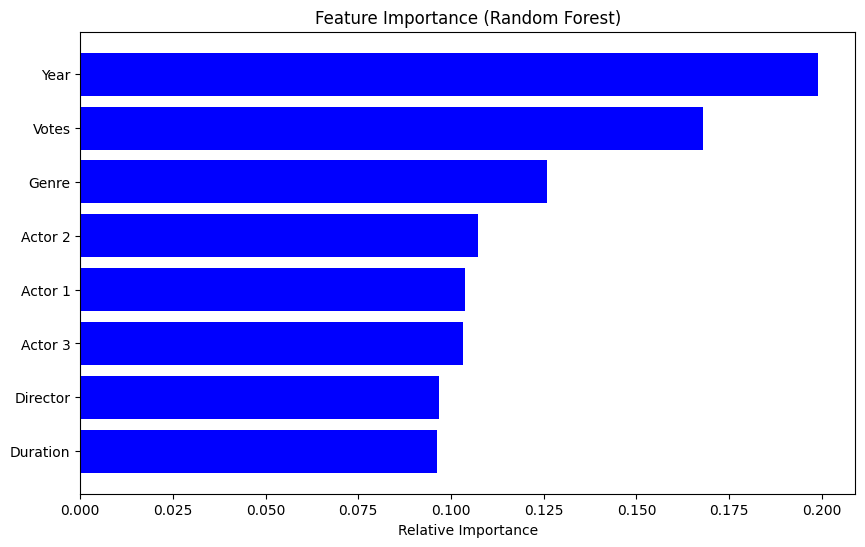

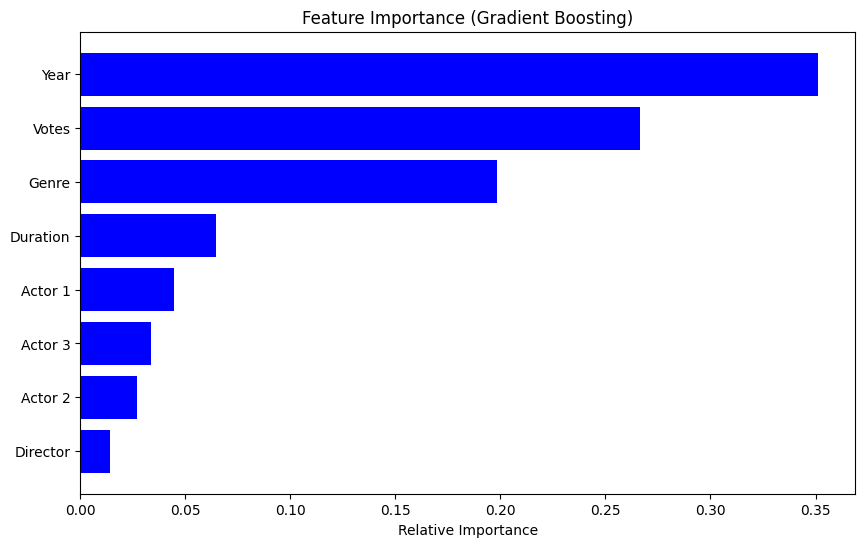

In [28]:
# Feature importance for Decision Tree
plot_feature_importance(dt_model, X_train, "Decision Tree")

# Feature importance for Random Forest
plot_feature_importance(rf_model, X_train, "Random Forest")

# Feature importance for Gradient Boosting
plot_feature_importance(gb_model, X_train, "Gradient Boosting")
